In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/M.E./2Sem/mlb/deep-learning/data/data.csv')
del data['Unnamed: 32']

In [2]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [28]:
# Hyper-parameters
num_reduced_features = 16
activation_func = 'relu'
epochs = 20

In [30]:
classifier = Sequential([
                         Dense(units=num_reduced_features, activation=activation_func, input_dim=30), # reduce from 30 to 16 features
                         Dropout(rate=.1),# prevent overfitting 
                         Dense(units=num_reduced_features, activation=activation_func),# second hidden layer
                         Dropout(rate=.1),
                         Dense(units=1, activation='sigmoid') # o/p single value as probability using sigmoid
])

In [31]:
classifier.compile(optimizer='adam',
                   loss='binary_crossentropy', # Since doing binary classification
                   metrics=['accuracy'])

In [32]:
classifier.fit(X_train, y_train, batch_size=100, epochs=epochs)

Epoch 1/20
6/6 [==============================] - 1s 3ms/step - loss: 0.6169 - accuracy: 0.6677
Epoch 2/20
6/6 [==============================] - 0s 3ms/step - loss: 0.5529 - accuracy: 0.6967
Epoch 3/20
6/6 [==============================] - 0s 3ms/step - loss: 0.4991 - accuracy: 0.7521
Epoch 4/20
6/6 [==============================] - 0s 3ms/step - loss: 0.4565 - accuracy: 0.7947
Epoch 5/20
6/6 [==============================] - 0s 3ms/step - loss: 0.4397 - accuracy: 0.8198
Epoch 6/20
6/6 [==============================] - 0s 3ms/step - loss: 0.3952 - accuracy: 0.8607
Epoch 7/20
6/6 [==============================] - 0s 4ms/step - loss: 0.3819 - accuracy: 0.8772
Epoch 8/20
6/6 [==============================] - 0s 4ms/step - loss: 0.3568 - accuracy: 0.8895
Epoch 9/20
6/6 [==============================] - 0s 3ms/step - loss: 0.3522 - accuracy: 0.8908
Epoch 10/20
6/6 [==============================] - 0s 2ms/step - loss: 0.3243 - accuracy: 0.9037
Epoch 11/20
6/6 [======================

In [33]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > .5)

In [34]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [35]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

Our accuracy is 94.73684210526315%


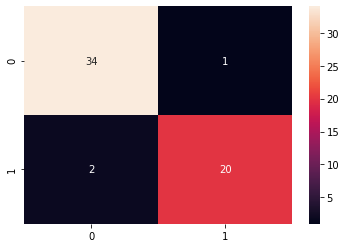

In [36]:
sns.heatmap(cm,annot=True)